# Wine Quality

## EDA and Preprocessing

* Preprocessing
* Exploratory Data Analysis (EDA)
* Create null model

In [34]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [35]:
#df_red = pd.read_csv('data/project1/wine-quality-red.csv')

df_red = pd.read_csv('wine_data/wine-quality-red.csv')

# Define predictors (X) and response (y)
target_col = df_red.columns[-1]      # assumes last column is quality
feature_cols = df_red.columns[:-1]

X = df_red[feature_cols]
y = df_red[target_col]

In [36]:
print(df_red.head())
print(df_red.describe())
print(df_red.info())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

**Correlation matrix:**

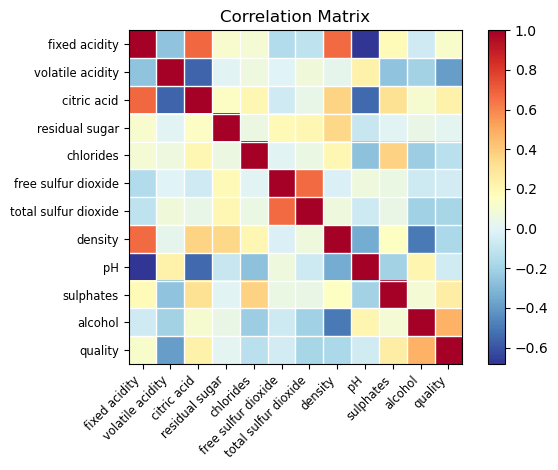

In [37]:
corr_matrix = df_red.corr()
sm.graphics.plot_corr(corr_matrix, xnames=corr_matrix.columns)
plt.show()

In [ ]:
# Correlation between each input feature and the response variable
corr_w_strength = df_red.corr(numeric_only=True)['quality'].drop('quality')
print(corr_w_strength)
# alcohol, volatile acidity, and sulphates exhibit the greatest correlation with the response variable, quality. 
# These features have values farthest away from 0.

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


**QQ plots:**

<Figure size 600x400 with 0 Axes>

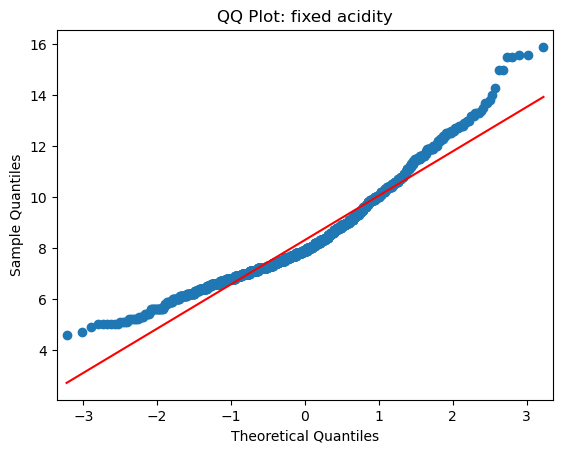

<Figure size 600x400 with 0 Axes>

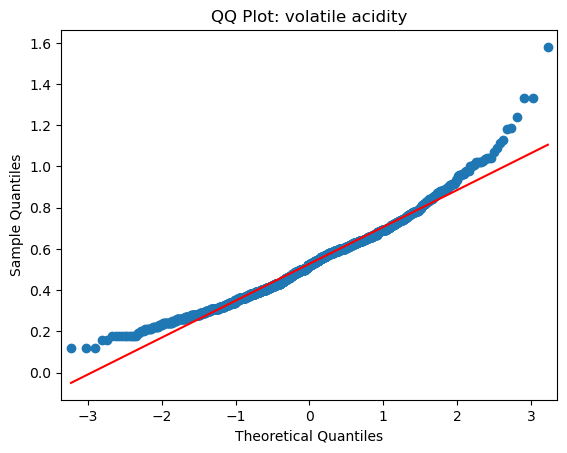

<Figure size 600x400 with 0 Axes>

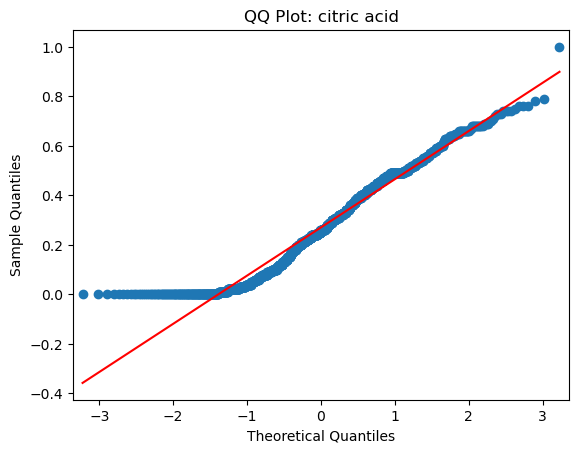

<Figure size 600x400 with 0 Axes>

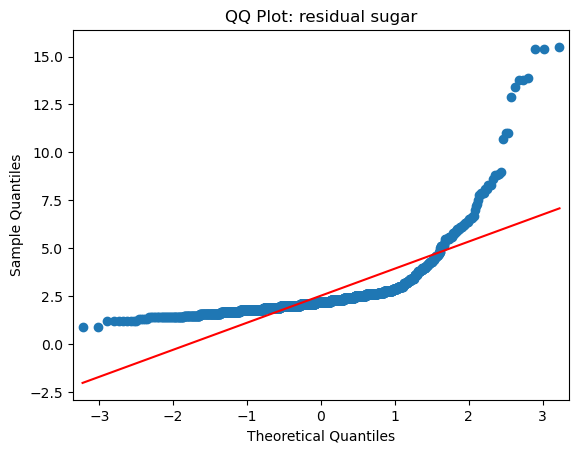

<Figure size 600x400 with 0 Axes>

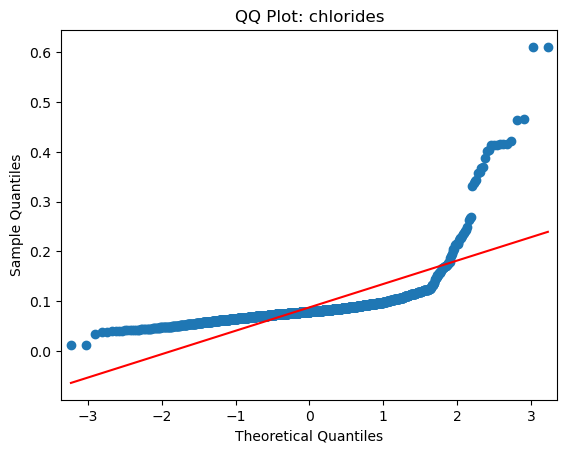

<Figure size 600x400 with 0 Axes>

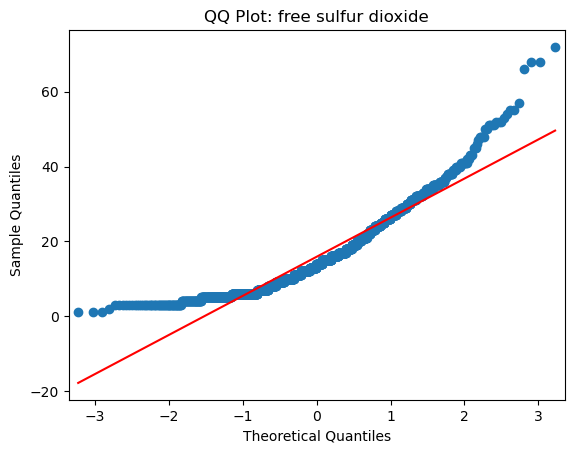

<Figure size 600x400 with 0 Axes>

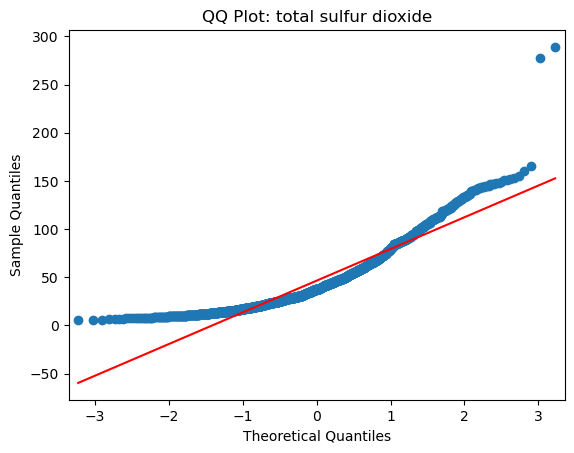

<Figure size 600x400 with 0 Axes>

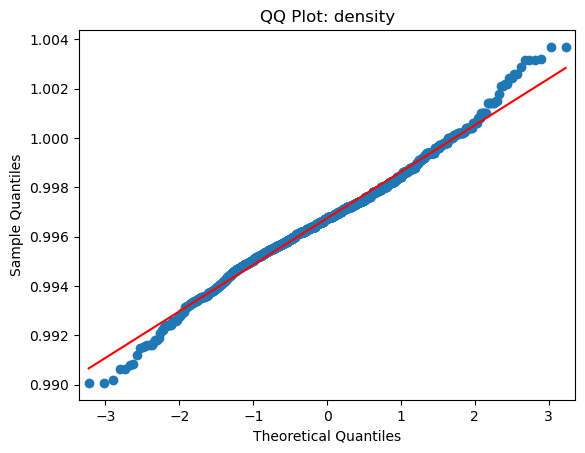

<Figure size 600x400 with 0 Axes>

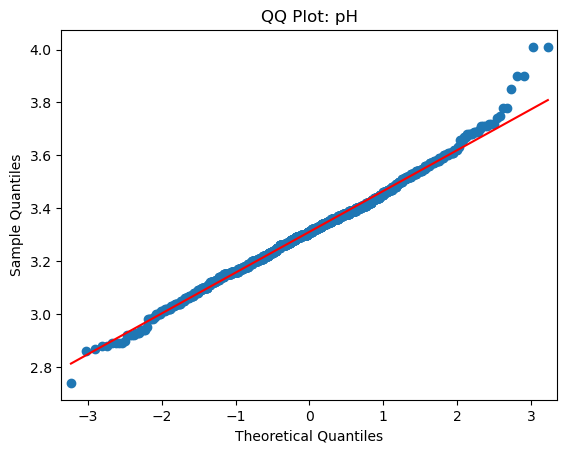

<Figure size 600x400 with 0 Axes>

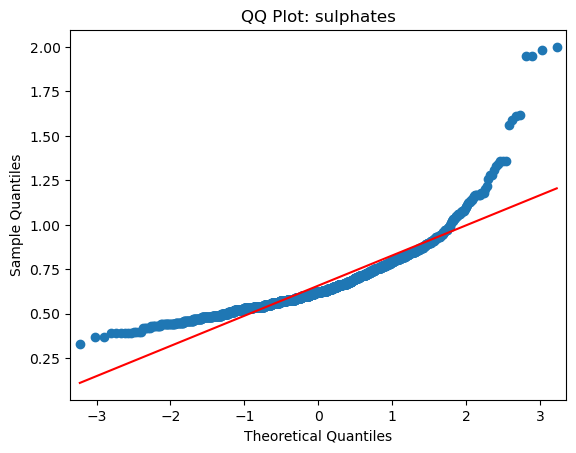

<Figure size 600x400 with 0 Axes>

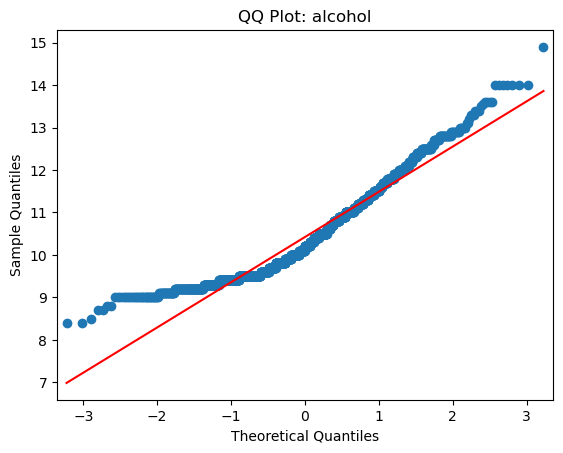

<Figure size 600x400 with 0 Axes>

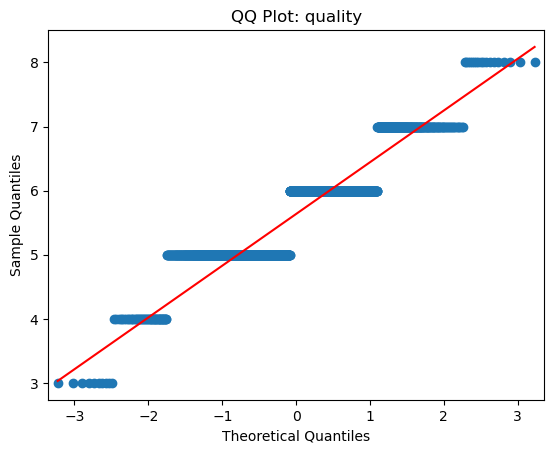

In [38]:
for col in df_red.columns:
    plt.figure(figsize=(6, 4))

    sm.qqplot(df_red[col], line='s')

    plt.title(f'QQ Plot: {col}')
    plt.show()

**Check missing values:**

In [39]:
print(df_red.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


**Outlier detection (using boxplots):**

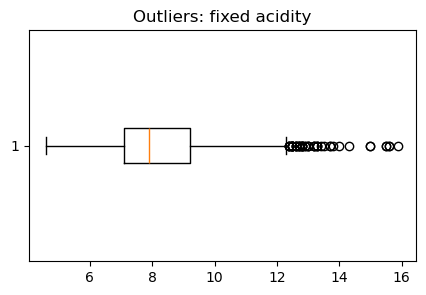

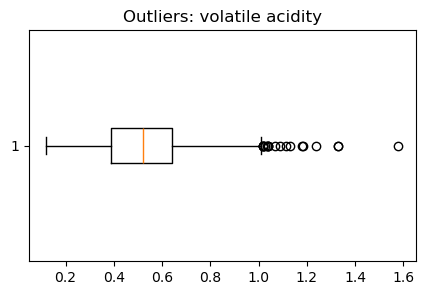

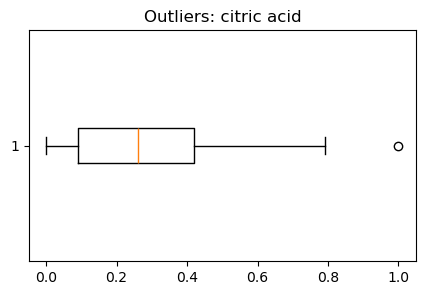

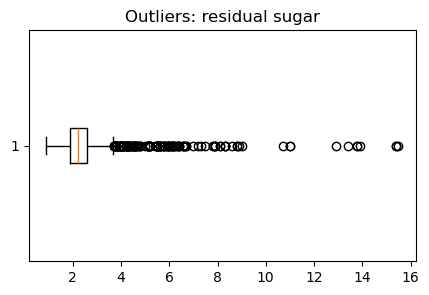

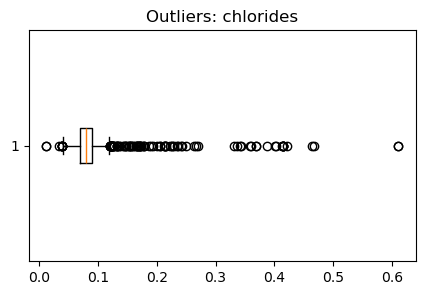

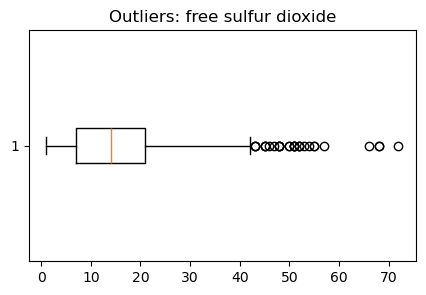

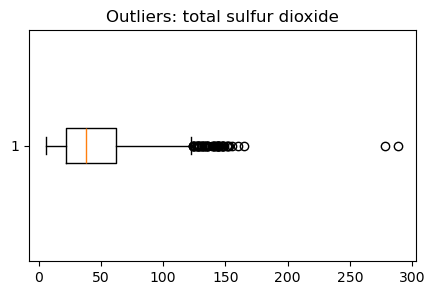

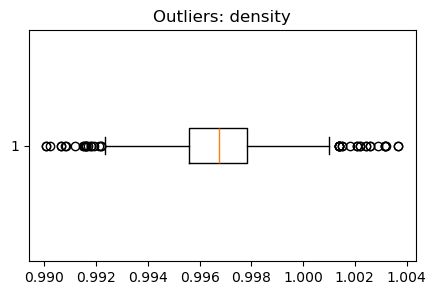

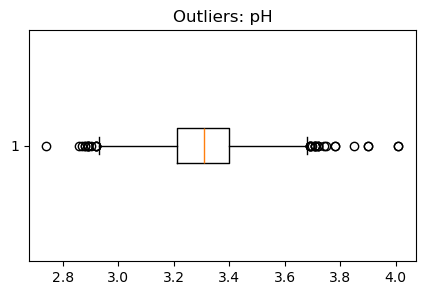

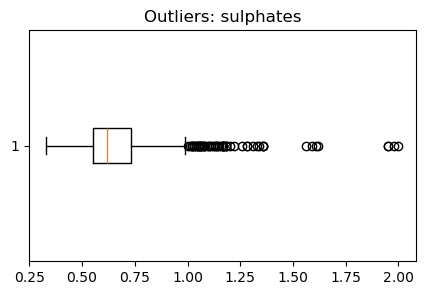

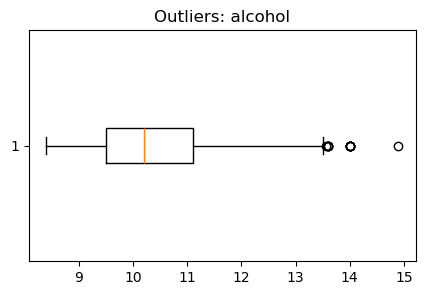

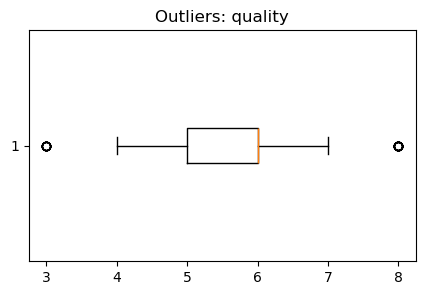

In [40]:
for col in df_red.columns:
    plt.figure(figsize=(5,3))
    plt.boxplot(df_red[col], vert=False)
    plt.title(f'Outliers: {col}')
    plt.show()

**Check multicollinearity (VIF):**

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

print(vif_data)

                 feature           VIF
0                  const  1.710538e+06
1          fixed acidity  7.767512e+00
2       volatile acidity  1.789390e+00
3            citric acid  3.128022e+00
4         residual sugar  1.702588e+00
5              chlorides  1.481932e+00
6    free sulfur dioxide  1.963019e+00
7   total sulfur dioxide  2.186813e+00
8                density  6.343760e+00
9                     pH  3.329732e+00
10             sulphates  1.429434e+00
11               alcohol  3.031160e+00


**Distribution plots:**

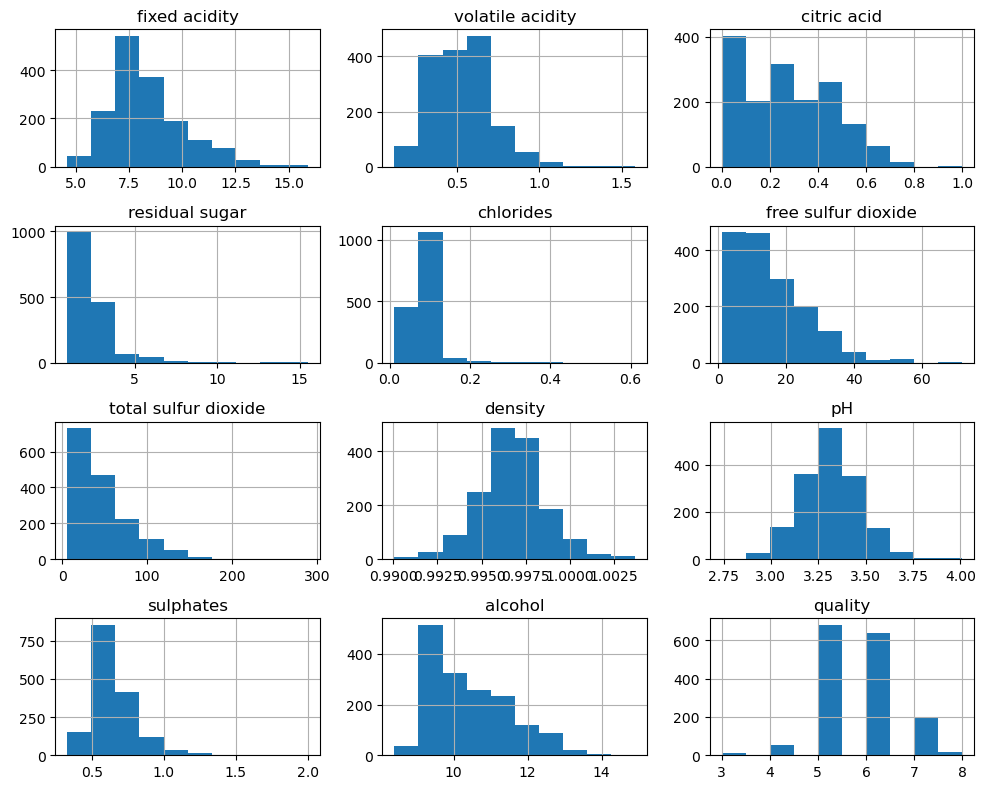

In [42]:
df_red.hist(figsize=(10,8))
plt.tight_layout()
plt.show()